### Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price.For the same purpose, the company has collected a data set from the sale of houses in Australia.The company is looking at prospective properties to buy to enter the market. A regression model using regularisation is to be built, in order to predict the actual value of the prospective properties and decide whether to invest in them or not. Determine the optimal value of lambda for ridge and lasso regression.

The company wants to know, 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.



### Business Goal

* This regression model will be used by the management to understand how exactly the prices vary with the variables
* Management can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

## Step 1: Loading, Reading and Understanding the Data

In [1]:
# Importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset

housedetails = pd.read_csv(r'C:\Users\rajee\OneDrive\Desktop\Upgrad ML & AI Course\1. Main course\12. Advanced regression assignment\train.csv')
housedetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Reading more details of the dataset

housedetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housedetails.shape

(1460, 81)

In [5]:
housedetails.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housedetails.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

## Step 2: EDA - Data Cleaning 

#### Imputing or removing Null values in Categorical attributes

In [7]:
# checking null values in all 43 categorical columns

housedetails.select_dtypes(include='object').isnull().sum()[housedetails.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# only 16 categorical variable columns, out of total 43 have Null values
# Replacing NA with None in these 16 columns 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housedetails[col]=housedetails[col].fillna('None')

#### It is observed that some of the categorical columns have same repeated value. 
#### We Remove those having 80% of entries with same value (i.e. 1180 entries as same value from total 1460 entries).

In [9]:
#### writing function to find such columns

def findrepeatedCategoricalValueCounts():
    column = []
    categorical_columns = housedetails.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housedetails[col].value_counts().max() >= 1180):
            column.append(col)
    return column

columnsRemoved = findrepeatedCategoricalValueCounts()

# Removing such columns with excess repeated data

housedetails.drop(columnsRemoved, axis = 1, inplace = True)

housedetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,61,0,0,0,0,None,0,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,None,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,42,0,0,0,0,None,0,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,35,272,0,0,0,None,0,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,84,0,0,0,0,None,0,12,2008,250000


#### Checking, Removing/Imputing null values in Numerical variables

In [10]:
# check the null values in the numerical data

housedetails.select_dtypes(include=['int64','float']).isnull().sum()[housedetails.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [11]:
# only 3 numerical variables out of 38 total are with null values
# We Impute the null values of LotFrontage and MasVnrArea with median values of the column 

housedetails['LotFrontage'] = housedetails['LotFrontage'].replace(np.nan, housedetails['LotFrontage'].median())
housedetails['MasVnrArea'] = housedetails['MasVnrArea'].replace(np.nan, housedetails['MasVnrArea'].median())

In [12]:
# GarageYrBlt will be handled further and meanwhile we can Set the null values with 0

housedetails['GarageYrBlt']=housedetails['GarageYrBlt'].fillna(0)
housedetails['GarageYrBlt'] = housedetails['GarageYrBlt'].astype(int)

In [13]:
# Adding a new derived column named Remodelled
# This column will confirm, whether the house has been remodelled or not based on the difference between year of remodel and year of built

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housedetails['Remodelled'] = housedetails.apply(checkForRemodel, axis=1)
housedetails.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,Remodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,0,0,None,0,2,2008,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,None,0,5,2007,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,0,0,None,0,9,2008,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,272,0,0,0,None,0,2,2006,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,0,0,0,None,0,12,2008,250000,0


In [14]:
# Adding a new derived column named AgeofBuilt_or_Remodel to find the age of the building, at the time of selling

def getAgeofBuilt_or_Remodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housedetails['AgeofBuilt_or_Remodel'] = housedetails.apply(getAgeofBuilt_or_Remodel, axis=1)
housedetails.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,Remodelled,AgeofBuilt_or_Remodel
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,0,None,0,2,2008,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,None,0,5,2007,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,0,None,0,9,2008,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,0,None,0,2,2006,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,0,0,None,0,12,2008,250000,0,8


In [15]:
# Adding a new derived column, which would indicate if the Garage is old or new.
# Garage Yr Built before 2000 will be considered as old (0), else considered as new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 for null values (81 entries only) will also be treated as old.

def getGarageoldornew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housedetails['OldOrNewGarage'] = housedetails['GarageYrBlt'].apply(getGarageoldornew)
housedetails.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,Remodelled,AgeofBuilt_or_Remodel,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,None,0,2,2008,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,None,0,5,2007,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,None,0,9,2008,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,None,0,2,2006,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,0,None,0,12,2008,250000,0,8,1


In [16]:
# Now columns "YearBuilt", "YearRemodAdd", "YrSold" and "GarageYrBlt" can be dropped, as their derived columns 
# will be used for analysis

housedetails.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### It is observed that some of the Numerical columns also have same repeated value. 
#### We Remove those having 80% of entries with same value (i.e. 1180 entries as same value from total 1460 entries).
#### Also, the column MoSold will not be used in analysis, hence removing the same.

In [17]:
def findrepeatedNumericalValueCounts():
    column = []
    numerical_columns = housedetails.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housedetails[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsRemoved = findrepeatedNumericalValueCounts()
housedetails.drop(columnsRemoved, axis = 1, inplace = True)

housedetails.drop(['MoSold'], axis = 1, inplace = True)

housedetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,Remodelled,AgeofBuilt_or_Remodel,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,RFn,2,548,0,61,None,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,RFn,2,460,298,0,None,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,RFn,2,608,0,42,None,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,Unf,3,642,0,35,None,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,RFn,3,836,192,84,None,250000,0,8,1


In [18]:
# All the null values have been treated
# Hence, checking for percentage of null values

percent_null = round(100*(housedetails.isnull().sum()/len(housedetails.index)), 2)
print(percent_null)

Id                       0.0
MSSubClass               0.0
MSZoning                 0.0
LotFrontage              0.0
LotArea                  0.0
LotShape                 0.0
LotConfig                0.0
Neighborhood             0.0
HouseStyle               0.0
OverallQual              0.0
OverallCond              0.0
RoofStyle                0.0
Exterior1st              0.0
Exterior2nd              0.0
MasVnrType               0.0
MasVnrArea               0.0
ExterQual                0.0
Foundation               0.0
BsmtQual                 0.0
BsmtExposure             0.0
BsmtFinType1             0.0
BsmtFinSF1               0.0
BsmtUnfSF                0.0
TotalBsmtSF              0.0
HeatingQC                0.0
1stFlrSF                 0.0
2ndFlrSF                 0.0
GrLivArea                0.0
BsmtFullBath             0.0
FullBath                 0.0
HalfBath                 0.0
BedroomAbvGr             0.0
KitchenQual              0.0
TotRmsAbvGrd             0.0
Fireplaces    

#### No null values in the dataset now

#### Now, Checking for Duplicates

In [19]:
housedetails[housedetails.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SalePrice,Remodelled,AgeofBuilt_or_Remodel,OldOrNewGarage


#### Hence, No duplicate entries in the dataset now

#### Checking for Outliers

In [20]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housedetails.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,AgeofBuilt_or_Remodel,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


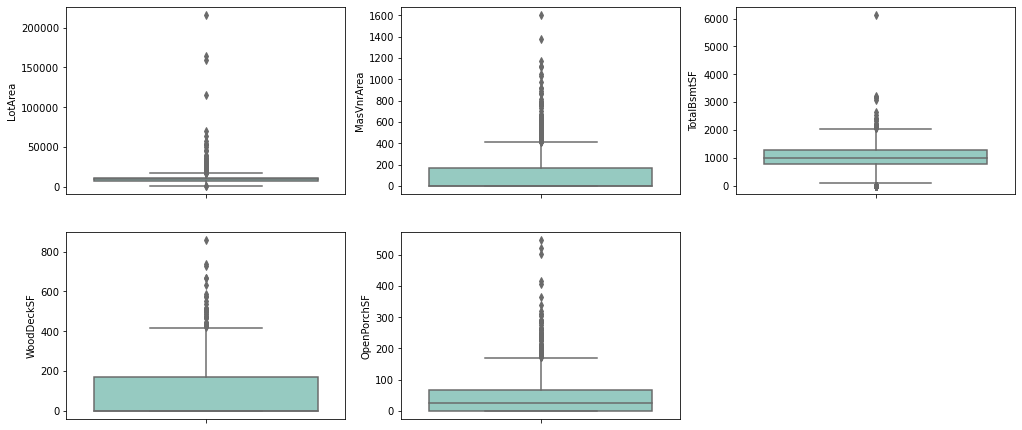

In [21]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housedetails)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housedetails)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housedetails)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housedetails)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housedetails)
plt.show()

In [22]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housedetails['LotArea'].quantile(0.98)
housedetails = housedetails[housedetails["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housedetails['MasVnrArea'].quantile(0.98)
housedetails = housedetails[housedetails["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housedetails['TotalBsmtSF'].quantile(0.99)
housedetails = housedetails[housedetails["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housedetails['WoodDeckSF'].quantile(0.99)
housedetails = housedetails[housedetails["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housedetails['OpenPorchSF'].quantile(0.99)
housedetails = housedetails[housedetails["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [23]:
# Determine the percentage of data retained

num_data = round(100*(len(housedetails)/1460),2)
print(num_data)

93.01


## Step 3: Data Visualization 

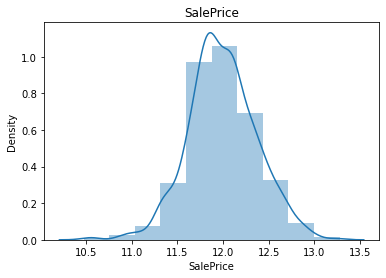

In [24]:
# Visualise the target variable SalePrice after transforming the sales price

housedetails['SalePrice'] = np.log1p(housedetails['SalePrice'])

plt.title('SalePrice')
sns.distplot(housedetails['SalePrice'], bins=10)
plt.show()

#### The target variable is normalized with some noise.

<Figure size 720x360 with 0 Axes>

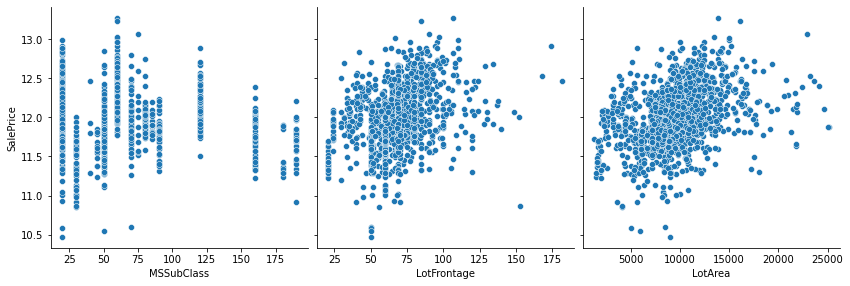

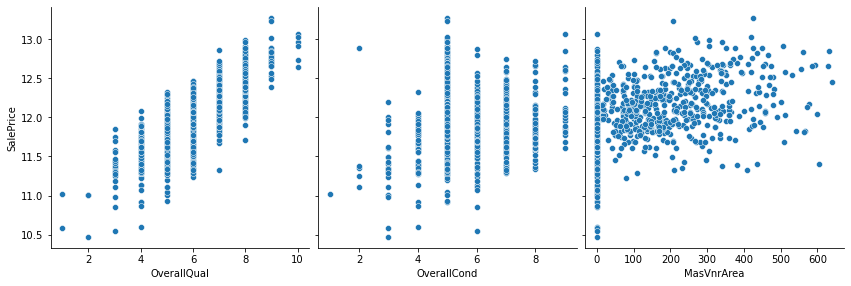

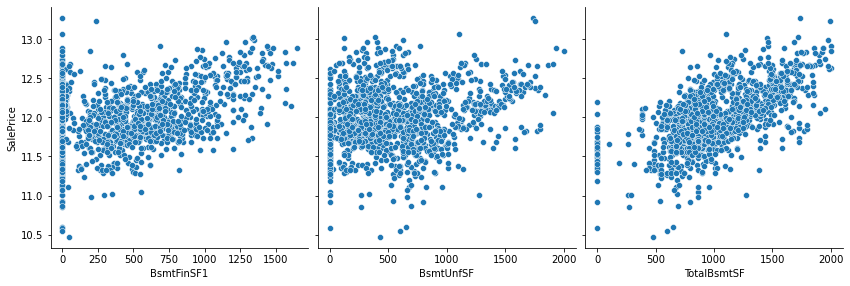

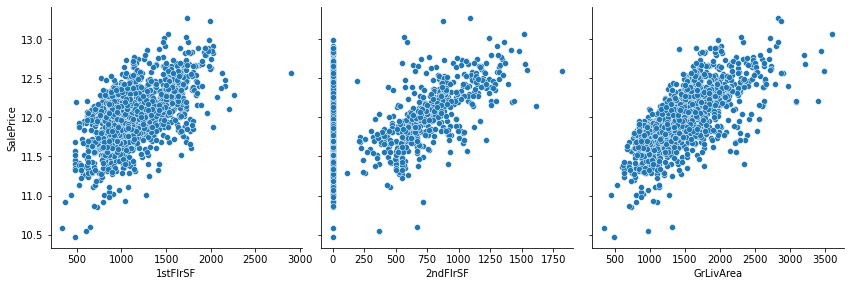

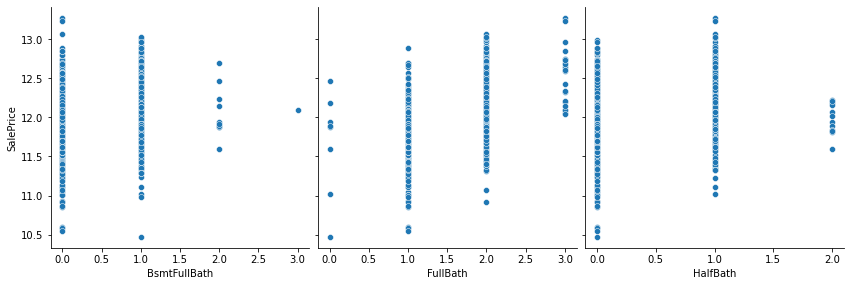

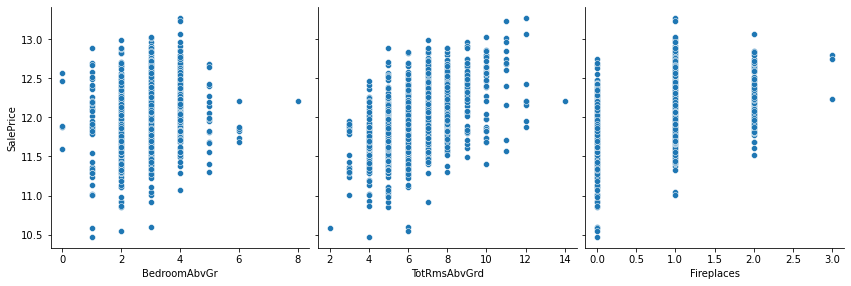

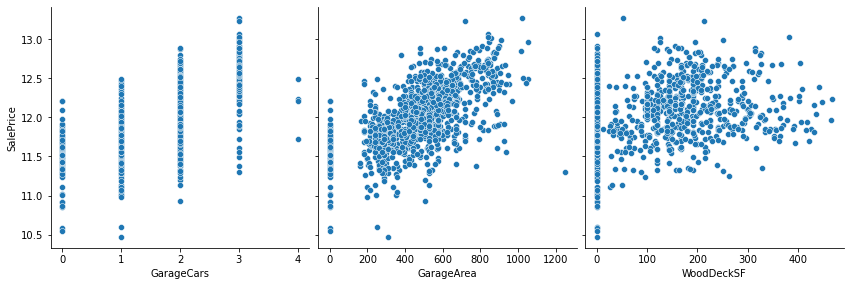

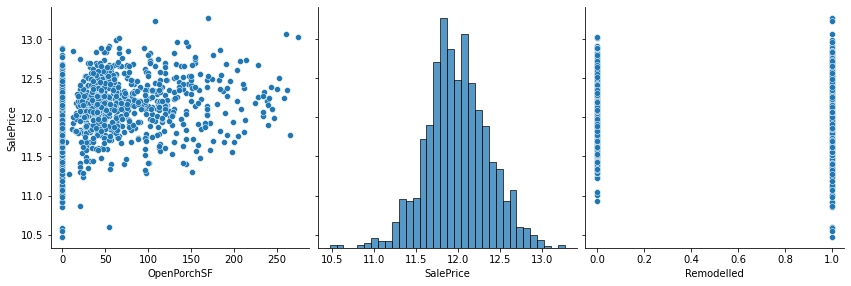

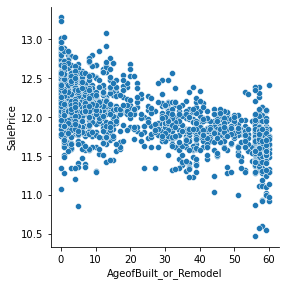

In [25]:
# using the pairplots to Check the numerical variables

plt.figure(figsize=(10,5))
sns.pairplot(housedetails, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housedetails, x_vars=['AgeofBuilt_or_Remodel'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### Most of the scatter plots are very random and do not show concrete trends
#### However, the 1stFlrSF, 2ndFlrSF and GrLivArea show somewhat rise in sales price towards right
#### Many other variables are also showing trends, which are in line with the intution snd will be analyzed further


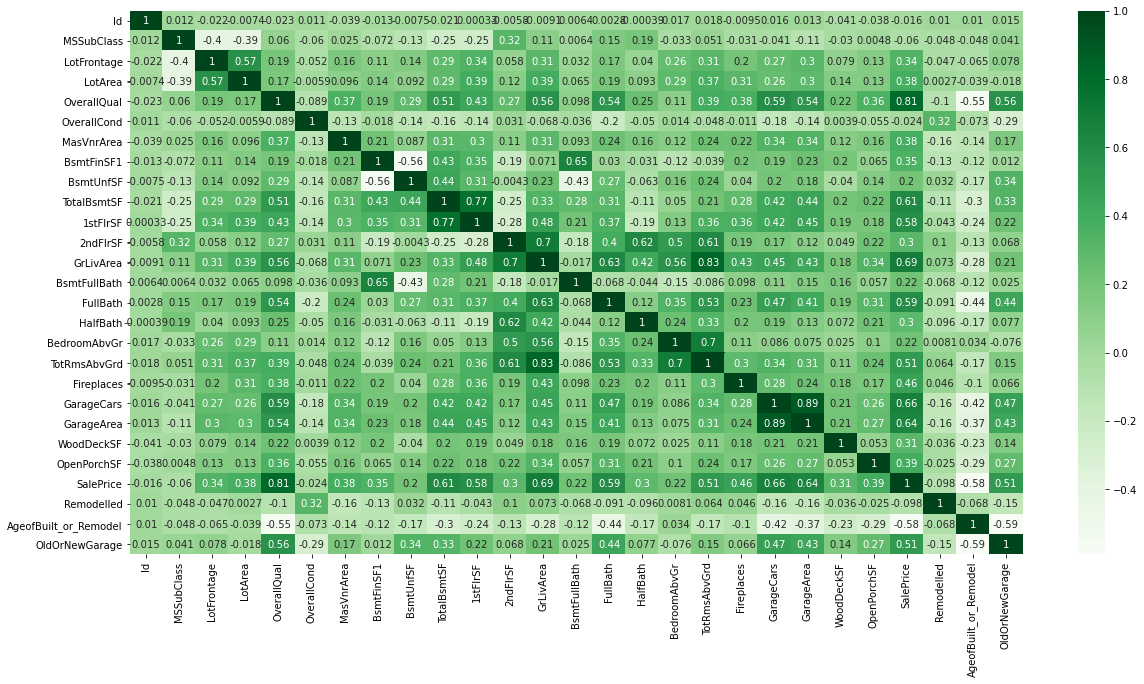

In [26]:
# correlation heatmap for numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housedetails.corr(), annot = True, cmap="Greens")
plt.show()

#### Removing variables showing high correlation
    - TotRmsAbvGrd and GrLivArea show 83%
    - Garage Area and Garage Cars show 89%

Hence dropping TotRmsAbvGrd and Garage Cars

In [27]:
# Removing the highly correlated variables

housedetails.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [28]:
# Checking the shape 

housedetails.shape

(1358, 45)

## Step 4: Data Preparation

  - Converting categorical variable into numerical
  - Creating Dummy variables

In [29]:
# The Data description is checked to identify the type of categorical variables
# for ordered categorical variables, we will assign values to them in order

# For unordered categorical variables, we categorise them into 0 and 1

housedetails['d_LotShape'] = housedetails['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housedetails['d_ExterQual'] = housedetails['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housedetails['d_BsmtQual'] = housedetails['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedetails['d_BsmtExposure'] = housedetails['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housedetails['d_BsmtFinType1'] = housedetails['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housedetails['d_HeatingQC'] = housedetails['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedetails['d_KitchenQual'] = housedetails['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedetails['d_FireplaceQu'] = housedetails['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housedetails['d_GarageFinish'] = housedetails['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

housedetails['d_HouseStyle'] = housedetails['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housedetails['d_Fence'] = housedetails['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housedetails['d_LotConfig'] = housedetails['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1,'None': 0  })
                                                      
housedetails['d_MasVnrType'] = housedetails['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })


housedetails.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,1,6,5,4,0,2,4,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,4,5,5,3,3,2,1,0,2,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,2,6,5,4,3,2,4,0,5,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,1,5,4,4,4,1,4,0,4,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,3,6,5,4,3,2,4,0,2,1


In [30]:
# The columns from which the new columns were derived, can be dropped
# The id column can also be dropped, as of no use

housedetails = housedetails.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType'], axis=1)

housedetails.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,6,5,4,0,2,4,0,5,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,4,5,5,3,3,2,1,0,2,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,2,6,5,4,3,2,4,0,5,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,1,5,4,4,4,1,4,0,4,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,3,6,5,4,3,2,4,0,2,1


In [31]:
# Creating dummy variables for few columns

# MSZoning

d_MSZoning = pd.get_dummies(housedetails['MSZoning'], prefix='MSZoning', drop_first = True)
housedetails = pd.concat([housedetails, d_MSZoning], axis = 1)

# Neighborhood

d_Neighborhood = pd.get_dummies(housedetails['Neighborhood'], prefix='Neighborhood', drop_first = True)
housedetails = pd.concat([housedetails, d_Neighborhood], axis = 1)

# Foundation

d_Foundation = pd.get_dummies(housedetails['Foundation'], prefix='Foundation', drop_first = True)
housedetails = pd.concat([housedetails, d_Foundation], axis = 1)

# GarageType

d_GarageType = pd.get_dummies(housedetails['GarageType'], prefix='GarageType', drop_first = True)
housedetails = pd.concat([housedetails, d_GarageType], axis = 1)

# RoofStyle

d_RoofStyle = pd.get_dummies(housedetails['RoofStyle'], prefix='RoofStyle', drop_first = True)
housedetails = pd.concat([housedetails, d_RoofStyle], axis = 1)

# Exterior1st

d_Exterior1st = pd.get_dummies(housedetails['Exterior1st'], prefix='Exterior1st', drop_first = True)
housedetails = pd.concat([housedetails, d_Exterior1st], axis = 1)

# Exterior2nd

d_Exterior2nd = pd.get_dummies(housedetails['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housedetails = pd.concat([housedetails, d_Exterior2nd], axis = 1)



housedetails.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Below columns can be dropped as dummy variables already created

housedetails = housedetails.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housedetails.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,0,0,0,0,1,0,0


In [33]:
housedetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 110 entries, MSSubClass to Exterior2nd_Wd Shng
dtypes: float64(3), int64(34), uint8(73)
memory usage: 500.0 KB


#### Hence, now All columns are numerical

## Step 5: Train Test Split

In [34]:
# creating set of independent feature variable to X

X = housedetails.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# Putting response variable to y

y = housedetails['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [36]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns=cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng'],
      dtype='object', length=109)

In [37]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=30)

## Step 6: Recursive feature elimination (RFE)¶

    Since there are around 109 features, we will use RFE to get the best 50 features out of the 109 features and use the new
    features for further analysis

In [38]:
# Running RFE with 50 output variables

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [39]:
# Assigning the columns selected by RFE to col

col = X_train.columns[rfe.support_]

# creating dataframe for the 50 features selected using RFE

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,GarageCars,True,1
9,OpenPorchSF,True,1


In [40]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [41]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

### Linear Regression

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.992589646861235
[-0.01311573  0.02835962  0.07219475  0.04235402  0.02860355  0.02956734
  0.12345865  0.00766313  0.04379381  0.00935175 -0.01140582 -0.02556559
  0.02315264  0.01990377  0.00910531  0.01545816  0.00943691  0.0169833
  0.00866341  0.07516755  0.03268246  0.14567918  0.10998609  0.01880792
 -0.01475343 -0.00805922 -0.00912412 -0.00822035  0.01779131 -0.01783633
  0.01533888  0.01249583  0.01723984  0.03173909  0.0117867   0.03547231
  0.0167271   0.02249111 -0.00825027 -0.00968151  0.02421092  0.02052358
  0.02478204  0.01454742  0.01080328  0.01469193 -0.00076227  0.01996459
  0.01747552  0.01250214]


In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.921798696217058
0.8881796185220872
10.633154653390523
6.065971961466943
0.011192794371990025
0.014867578336928781


#### Ridge

In [46]:
# manually giving list of parameters

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 8.0}


In [48]:
# ridge - mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=1000]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,8.0,-0.076267,-0.081670,1
18,7.0,-0.076229,-0.081672,2
17,6.0,-0.076188,-0.081680,3
16,5.0,-0.076149,-0.081686,4
20,9.0,-0.076303,-0.081690,5
15,4.0,-0.076110,-0.081691,6
14,3.0,-0.076068,-0.081697,7
13,2.0,-0.076020,-0.081703,8
12,1.0,-0.075976,-0.081706,9
11,0.9,-0.075972,-0.081706,10


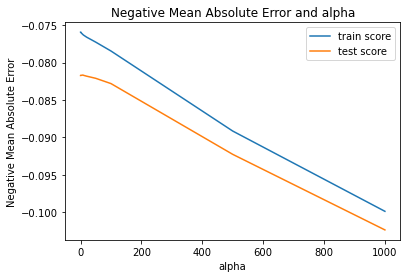

In [49]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [50]:
# best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=8.0)

In [51]:
# check the coefficient values with lambda = 8

alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01165278,  0.02804243,  0.07362444,  0.04298676,  0.0294489 ,
        0.03053072,  0.12143486,  0.00743785,  0.04343092,  0.00978028,
       -0.01212795, -0.0261776 ,  0.02255128,  0.01878874,  0.00928844,
        0.01557148,  0.0098833 ,  0.01779446,  0.00821669,  0.05036624,
        0.02048195,  0.09905504,  0.06797986,  0.01894793, -0.01416142,
       -0.00763817, -0.0079227 , -0.00761082,  0.01714823, -0.01665894,
        0.01626179,  0.01211828,  0.01467885,  0.03014594,  0.01161894,
        0.03483726,  0.01671647,  0.02138118, -0.0078884 , -0.00958667,
        0.02342115,  0.01907678,  0.02251398,  0.01289297,  0.0101888 ,
        0.01339798, -0.00083857,  0.01864526,  0.0168208 ,  0.01107433])

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9212434995019406
0.8871435069419066
10.708645626677669
6.122178385655971
0.011272258554397546
0.015005339180529341


In [53]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0117
1,LotArea,0.0280
2,OverallQual,0.0736
3,OverallCond,0.0430
4,BsmtFinSF1,0.0294
5,TotalBsmtSF,0.0305
6,GrLivArea,0.1214
7,BsmtFullBath,0.0074
8,GarageCars,0.0434
9,OpenPorchSF,0.0098


In [54]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0117,
 'LotArea': 0.028,
 'OverallQual': 0.0736,
 'OverallCond': 0.043,
 'BsmtFinSF1': 0.0294,
 'TotalBsmtSF': 0.0305,
 'GrLivArea': 0.1214,
 'BsmtFullBath': 0.0074,
 'GarageCars': 0.0434,
 'OpenPorchSF': 0.0098,
 'Remodelled': -0.0121,
 'AgeofBuilt_or_Remodel': -0.0262,
 'd_BsmtQual': 0.0226,
 'd_BsmtExposure': 0.0188,
 'd_BsmtFinType1': 0.0093,
 'd_HeatingQC': 0.0156,
 'd_KitchenQual': 0.0099,
 'd_FireplaceQu': 0.0178,
 'd_GarageFinish': 0.0082,
 'MSZoning_FV': 0.0504,
 'MSZoning_RH': 0.0205,
 'MSZoning_RL': 0.0991,
 'MSZoning_RM': 0.068,
 'Neighborhood_Crawfor': 0.0189,
 'Neighborhood_MeadowV': -0.0142,
 'Neighborhood_Mitchel': -0.0076,
 'Neighborhood_NAmes': -0.0079,
 'Neighborhood_NWAmes': -0.0076,
 'Neighborhood_NridgHt': 0.0171,
 'Neighborhood_OldTown': -0.0167,
 'Neighborhood_Somerst': 0.0163,
 'Neighborhood_StoneBr': 0.0121,
 'Foundation_CBlock': 0.0147,
 'Foundation_PConc': 0.0301,
 'Foundation_Slab': 0.0116,
 'GarageType_Attchd': 0.0348,
 'GarageType_BuiltI

#### RFE

In [55]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [56]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1214
11,MSZoning_RL,True,1,0.0991
1,OverallQual,True,1,0.0736
12,MSZoning_RM,True,1,0.0680
9,MSZoning_FV,True,1,0.0504
6,GarageCars,True,1,0.0434
2,OverallCond,True,1,0.0430
14,GarageType_Attchd,True,1,0.0348
4,TotalBsmtSF,True,1,0.0305
13,Foundation_PConc,True,1,0.0301


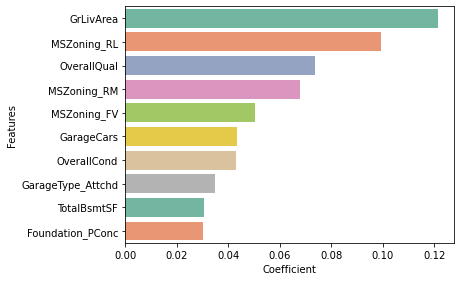

In [57]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()

##### The 10 most important features for predicting sales price of a house is mentioned in the above bar chart,through Ridge method   

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9212434995019406
0.8871435069419066
10.708645626677669
6.122178385655971
0.011272258554397546
0.015005339180529341


### Lasso

In [59]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.075980,-0.081733,1
1,0.0002,-0.076033,-0.081772,2
2,0.0003,-0.076110,-0.081833,3
3,0.0004,-0.076212,-0.081905,4
4,0.0005,-0.076328,-0.081997,5
5,0.001,-0.077129,-0.082665,6
6,0.002,-0.078450,-0.083283,7
7,0.003,-0.079314,-0.083589,8
8,0.004,-0.080035,-0.084001,9
9,0.005,-0.080863,-0.084569,10


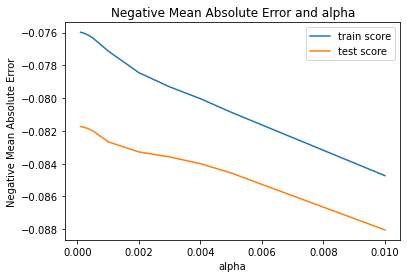

In [61]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [63]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.01276436,  0.02811948,  0.07281464,  0.04249072,  0.02888726,
        0.02976084,  0.12322138,  0.00753113,  0.04395326,  0.00935348,
       -0.01150465, -0.02565122,  0.02287361,  0.0196445 ,  0.00907122,
        0.01537466,  0.00945143,  0.01697298,  0.00858263,  0.07110374,
        0.03045609,  0.13776386,  0.10257778,  0.01875178, -0.0144115 ,
       -0.00783138, -0.00868974, -0.0079876 ,  0.01755532, -0.01755148,
        0.01522852,  0.01231816,  0.01618585,  0.03099591,  0.01145828,
        0.03483015,  0.01636791,  0.02169243, -0.00800291, -0.00968324,
        0.02359276,  0.01917527,  0.02331871,  0.01342075,  0.01019728,
        0.01335158, -0.00077897,  0.019075  ,  0.01710009,  0.01128432])

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9217725209133604
0.8883069484051083
10.636713750731014
6.059064638400658
0.011196540790243173
0.014850648623531025


In [65]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0128
1,LotArea,0.0281
2,OverallQual,0.0728
3,OverallCond,0.0425
4,BsmtFinSF1,0.0289
5,TotalBsmtSF,0.0298
6,GrLivArea,0.1232
7,BsmtFullBath,0.0075
8,GarageCars,0.0440
9,OpenPorchSF,0.0094


In [66]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.012764356579360196,
 'LotArea': 0.028119483776680172,
 'OverallQual': 0.07281463608230525,
 'OverallCond': 0.042490721868327745,
 'BsmtFinSF1': 0.028887255630720386,
 'TotalBsmtSF': 0.029760835315285106,
 'GrLivArea': 0.12322137551660252,
 'BsmtFullBath': 0.007531130011786903,
 'GarageCars': 0.04395326243229264,
 'OpenPorchSF': 0.009353480824374863,
 'Remodelled': -0.011504654788501049,
 'AgeofBuilt_or_Remodel': -0.025651215660611088,
 'd_BsmtQual': 0.022873611313110928,
 'd_BsmtExposure': 0.019644503067183267,
 'd_BsmtFinType1': 0.009071221084571557,
 'd_HeatingQC': 0.015374655402866616,
 'd_KitchenQual': 0.009451431162076543,
 'd_FireplaceQu': 0.016972980011913334,
 'd_GarageFinish': 0.008582631907859713,
 'MSZoning_FV': 0.07110373574197874,
 'MSZoning_RH': 0.030456088383759353,
 'MSZoning_RL': 0.13776386216449066,
 'MSZoning_RM': 0.10257777831417127,
 'Neighborhood_Crawfor': 0.01875178470380321,
 'Neighborhood_MeadowV': -0.014411502210581448,
 'Neighborhood_Mitchel

In [67]:
#### It is to be noted that lasso makes the coeff. of one of the feature variable 'RoofStyle_Gable' to 0, 
#### hence helps in feature elimination

#### RFE

In [68]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [69]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.137764
5,GrLivArea,True,1,0.123221
12,MSZoning_RM,True,1,0.102578
1,OverallQual,True,1,0.072815
9,MSZoning_FV,True,1,0.071104
6,GarageCars,True,1,0.043953
2,OverallCond,True,1,0.042491
14,GarageType_Attchd,True,1,0.034830
13,Foundation_PConc,True,1,0.030996
10,MSZoning_RH,True,1,0.030456


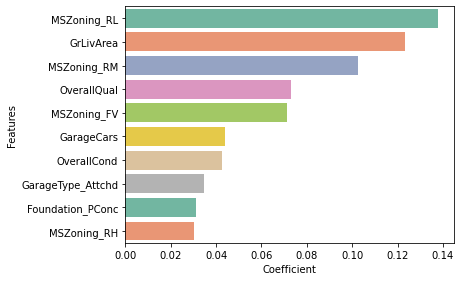

In [70]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

##### The 10 most important features for predicting sales price of a house is mentioned in the above bar chart,through Lasso method   

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9217725209133604
0.8883069484051083
10.636713750731014
6.059064638400658
0.011196540790243173
0.014850648623531025


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.921799,0.921243,0.921773
1,R2 Score (Test),0.888180,0.887144,0.888307
2,RSS (Train),10.633155,10.708646,10.636714
3,RSS (Test),6.065972,6.122178,6.059065
4,MSE (Train),0.105796,0.106171,0.105814
5,MSE (Test),0.121933,0.122496,0.121863


## Conclusion :

- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge  8
    - Lasso  0.0001
    
- The Mean Squared error in case of Ridge and Lasso are:
    - Ridge  0.122196	
    - Lasso  0.121863
    

- Mainly, The Mean Squared Error of Lasso is slightly lower than that of Ridge

- The R2 Score(Test) of lasso is also slightly better than Ridge and also it has less difference from R2 Score(Train)

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature 'RoofStyle_Gable' became 0), Lasso has a slightly better edge over Ridge.
  
- Hence based on Lasso, the 10 most significant factors, that generally affect the price are the Zoning classification (RL, RM, FV, RH), Living  area square feet, Overall quality and condition of the house, Foundation type of the house, Garage type attached to the house and Number of cars in the garage.
    